# Image Classification

In [1]:
# Dataset Preparation

In [2]:
import numpy as np
import os
from pathlib import Path

from keras.preprocessing import image

In [54]:
p = Path("images/")

dirs = p.glob("*")

labels_dict = {"cat":0,"dog":1,"horse":2,"human":3}
image_data = []
labels = []

for folder_dir in dirs:
    
    label = str(folder_dir).split("/")[-1][:-1]
    #print(label)
    
    for img_path in folder_dir.glob("*.jpg"):
        
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        
        image_data.append(img_array)
        labels.append(labels_dict[label])


In [55]:
print(len(image_data))
print(len(labels))

808
808


In [56]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(808, 32, 32, 3) (808,)


In [57]:
### Randomly shuffle the data

In [58]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

image_data[:],labels[:] = zip(*combined)

In [59]:
### Visualise this data

In [99]:
from matplotlib import pyplot as plt
def drawImg(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

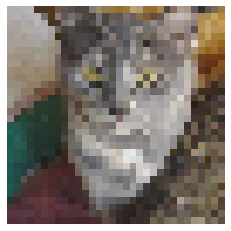

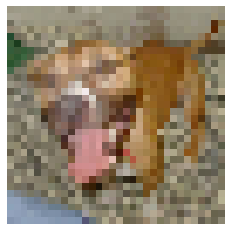

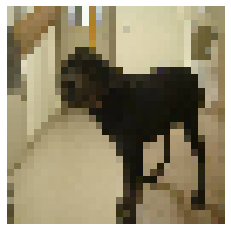

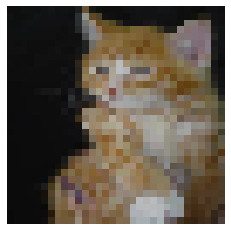

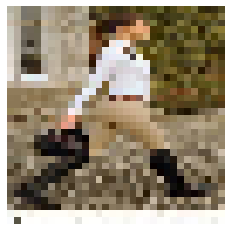

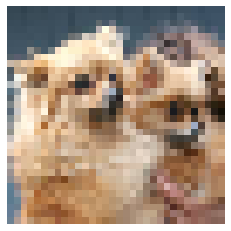

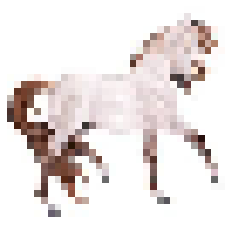

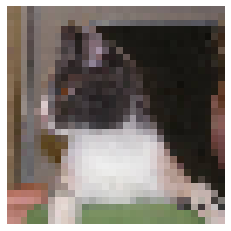

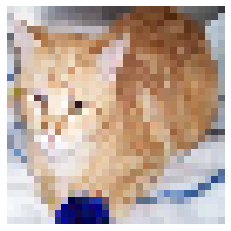

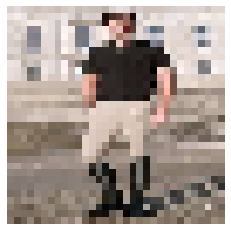

In [61]:
for i in range(10):
    drawImg(image_data[i])

In [51]:
# SVM

In [110]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        W = np.zeros((1,no_of_features))
        b = 0
        
        print(self.hingeLoss(W,b,X,Y))  
        
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeLoss(W,b,X,Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw = 0
                gradb = 0
                
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+b)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                W = W - n*W + n*gradw
                b = b + n*gradb
        
        self.W = W
        self.b = b
        return W,b,losses

In [111]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [112]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [113]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [114]:
data = classWiseData(image_data,labels)

In [115]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

202
202
202
202


In [116]:
def getDataPairForSVM(d1,d2):
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair,data_labels
    

In [117]:
# Training SVM

404.0
[404.0, 403.31098385742337, 402.6220052244485, 401.9330750989111, 401.2441834441204, 400.55533029855576, 399.866520499156, 399.17775286988547, 398.48902600866097, 397.8003378736994, 397.1116930189713, 396.42308920544895, 395.7345277267978, 395.046004363832, 394.35752180910373, 393.6690850176214, 392.98068763211876, 392.29232987171264, 391.6040159687842, 390.9157438159103, 390.2275131915789, 389.53931996359665, 388.8511723776205, 388.163062332272, 387.4749951014723, 386.78696892555973, 386.0989808707104, 385.41103773039646, 384.7231339133657, 384.0352731849953, 383.3474571816276, 382.6596775346623, 381.97193914541106, 381.28424502922763, 380.59658975112234, 379.90897622019446, 379.22140474721755, 378.53387533339765, 377.8463894837412, 377.1589416859766, 376.47153361762776, 375.78416902947293, 375.09684605946774, 374.40956251808825, 373.7223194511244, 373.05741536426774, 372.3841346843474, 371.7192725863488, 371.0656248870129, 370.42167904658555, 369.76810823906084, 369.11457721841

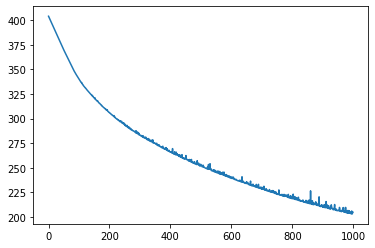

In [118]:
mySVM = SVM()

xp,yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
print(loss)
plt.plot(loss)

In [124]:
def trainSVMs(x,y):
    
    svm_classifiers={}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

404.0


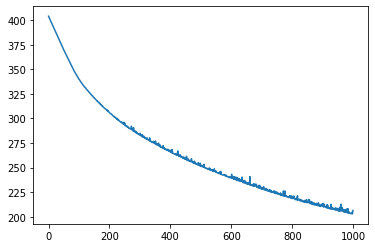

404.0


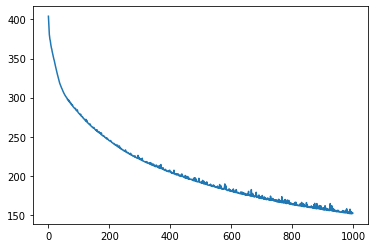

404.0


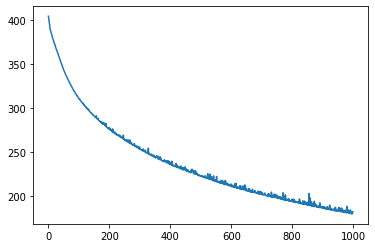

404.0


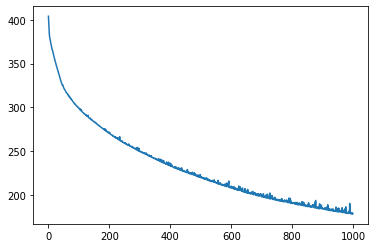

404.0


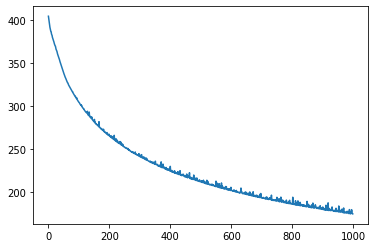

404.0


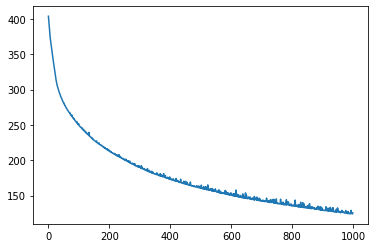

In [125]:
svm_classifiers = trainSVMs(image_data,labels)

In [128]:
cats_dogs = svm_classifiers[0][1]
print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
-0.032149999999999804


In [129]:
# Prediction

In [130]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [131]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
         
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction
            
     

In [132]:
print(predict(image_data[100]))
print(labels[100])

3
3


In [133]:
def accuracy(x,y):
    
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [134]:
accuracy(image_data,labels)

0.6175742574257426

In [135]:
from sklearn import svm

In [136]:
svm_classifier = svm.SVC(kernel = 'linear', C=1.0)

In [137]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6633663366336634